<a href="https://colab.research.google.com/github/hongqin/quantum_sandbox/blob/main/20240710_QCworkshop_Liang_Ex04_VariationalCircuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 04: Variational Quantum Circuit

## Prepared by Dr. Yu Liang, CSE at UTC on March 28, 2024



## PART 1: Import the library

In [ ]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet

In [ ]:
import numpy as np

# Import Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_state_city
# from matplotlib import style
%matplotlib inline
import qiskit.quantum_info as qi

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

## Part 2: Define a Variational Quantum Circuit

## 2.0: Define the inputs and parameters

In [ ]:
from qiskit.circuit import Parameter
# Parameters (labels are for display only):
theta1 = Parameter("θ1")
theta2 = Parameter("θ2")
theta3 = Parameter("θ3")

X1 = Parameter("X1")
X2 = Parameter("X2")
X3 = Parameter("X3")

In [ ]:
N = 3  # defining how many qubits will be used

## 2.1: Define the input layer

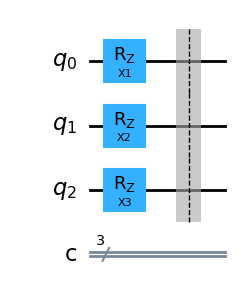

In [ ]:
# Step 0: Prepare superposition state
prep_circuit = QuantumCircuit(N, N)
prep_circuit.rz(X1, 0)
prep_circuit.rz(X2, 1)
prep_circuit.rz(X3, 2)
prep_circuit.barrier()
prep_circuit.draw("mpl")

## 2.2: Define the hidden layer -- parameterized circuit

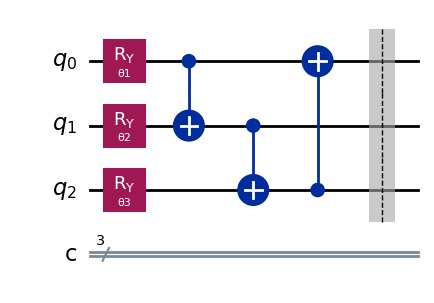

In [ ]:
# Step 1: Send input to blackbox
# Here, we will experiment with 3 blackboxes
# The first is the constant function f(x) = 1
constant_circuit = QuantumCircuit(N, N)

constant_circuit.ry(theta1, 0)
constant_circuit.ry(theta2, 1)
constant_circuit.ry(theta3, 2)

constant_circuit.cx(0,1)
constant_circuit.cx(1,2)
constant_circuit.cx(2,0)
constant_circuit.barrier()
constant_circuit.draw(output="mpl")

## 2.3: Entanglement layer

## 2.3: Defin the output layer

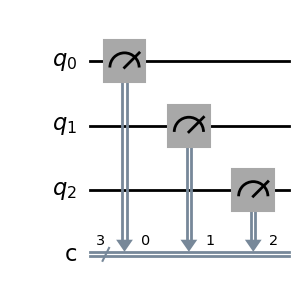

In [ ]:
# Step 2: Apply Hadamard to all qubits and measure
measure_circuit = QuantumCircuit(N, N)
measure_circuit.measure(range(N), range(N))
measure_circuit.draw(output="mpl")

## 2.3: Create the Measuring Sub-Circuit

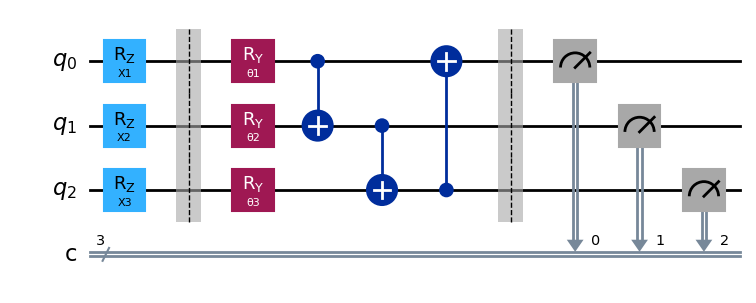

In [ ]:
# An example of what the assembled circuit looks like
(prep_circuit & constant_circuit & measure_circuit).draw(output="mpl")

## PART 3: Define a Re-Uploading Variational Circuit

## 3.1: Extra parameterized layer

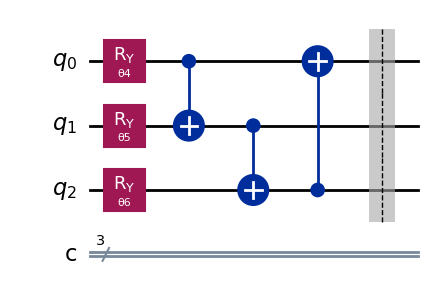

In [ ]:
theta4 = Parameter("θ4")
theta5 = Parameter("θ5")
theta6 = Parameter("θ6")

extra_circuit = QuantumCircuit(N, N)

extra_circuit.ry(theta4, 0)
extra_circuit.ry(theta5, 1)
extra_circuit.ry(theta6, 2)

extra_circuit.cx(0,1)
extra_circuit.cx(1,2)
extra_circuit.cx(2,0)
extra_circuit.barrier()
extra_circuit.draw(output="mpl")



## 3.2: Extended Variational Circuit

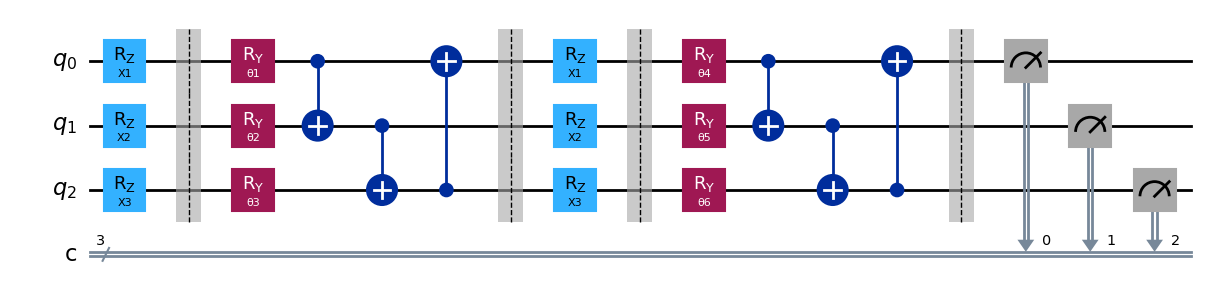

In [ ]:
(prep_circuit & constant_circuit & prep_circuit & extra_circuit & measure_circuit).draw(output="mpl")